# Imports and About

Import the needed packages for plotting and setup Matplotlib for inline plotting. This Jupyter notebook is used to summarized the data from the PAME experiments script (`pame-experiments.sh`) and statistical hypothesis tests for improvements. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from scipy.stats import f
from scipy.stats import norm
from scipy.stats import wilcoxon

# Plotters

Load and plot the data from the MOA csv files. Provide a plot for each data set with each of the classification algorithms and build a matrix with the averaged accuracies, which will be used for testing for statistical improvements to the accuracy of a classifier. All of the plots are saved to the `plots/` directory as a `pdf`. 


/Users/gditzler/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


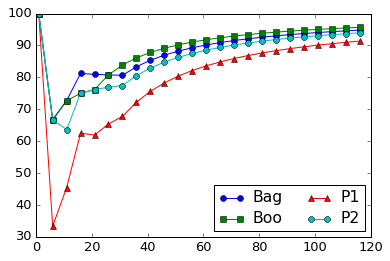

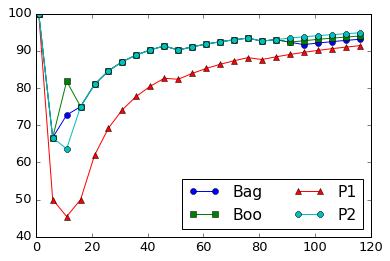

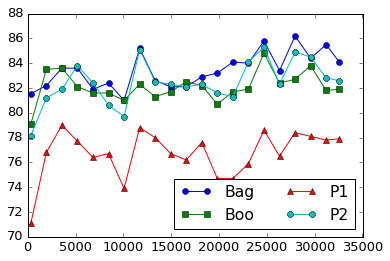

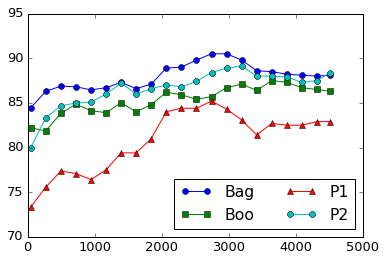

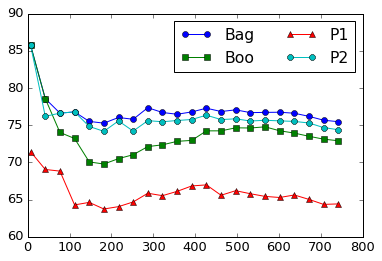

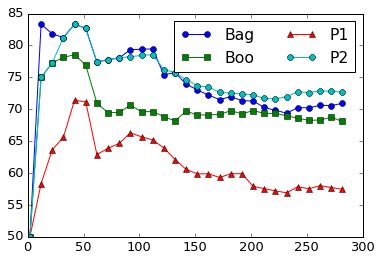

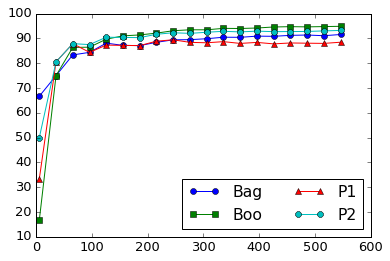

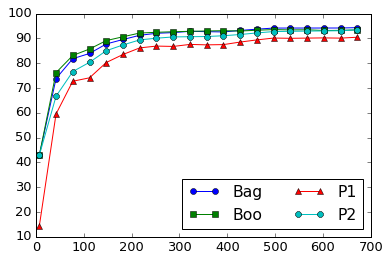

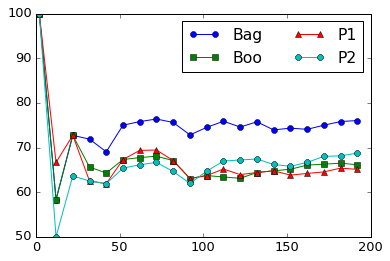

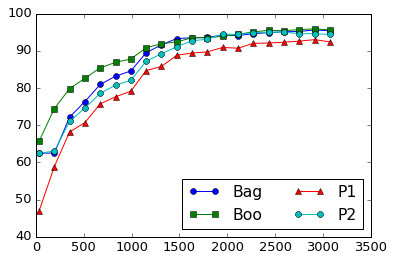

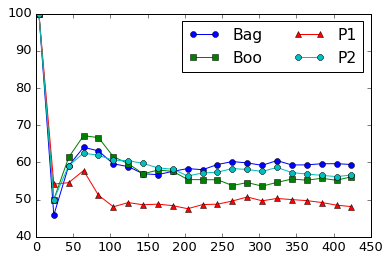

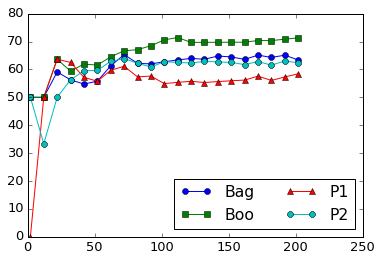

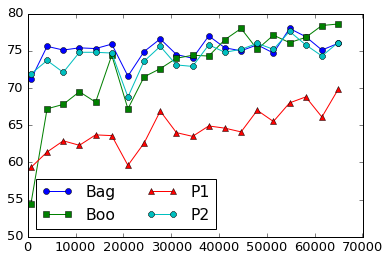

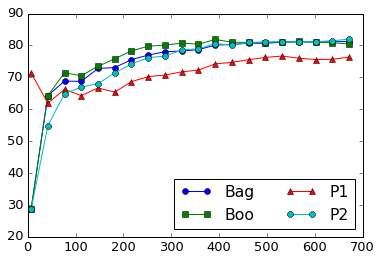

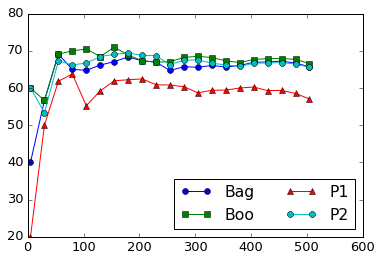

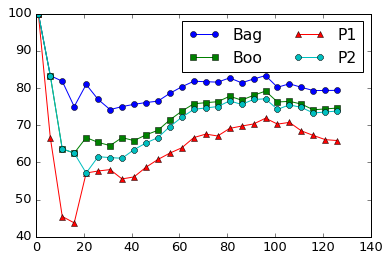

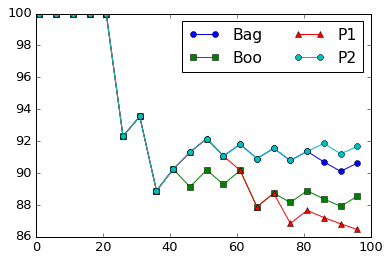

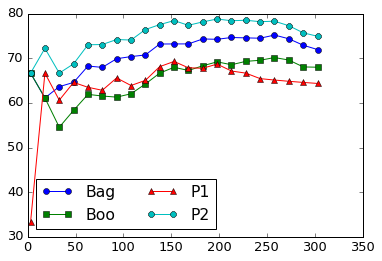

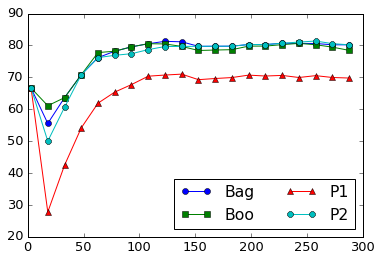

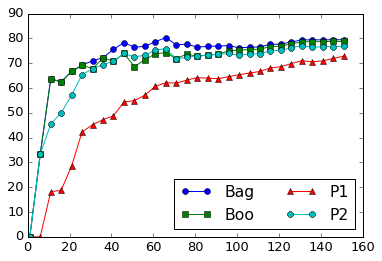

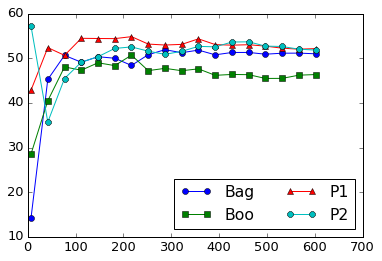

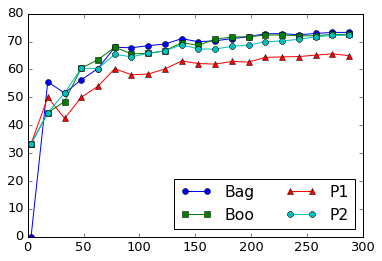

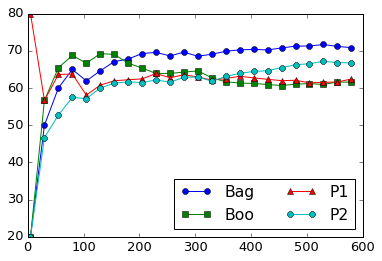

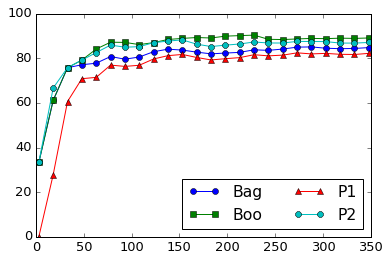

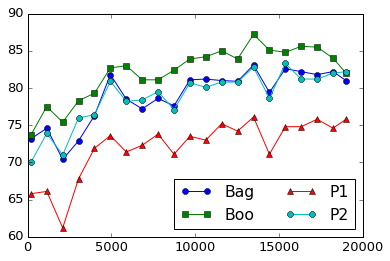

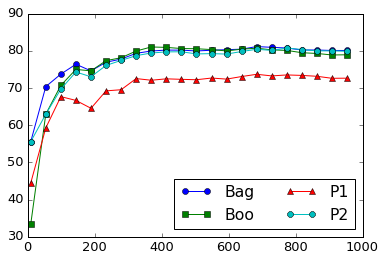

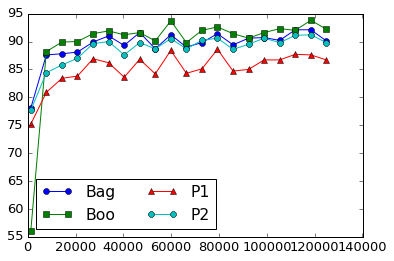

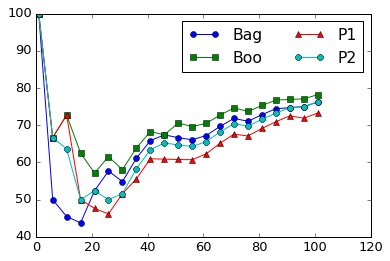

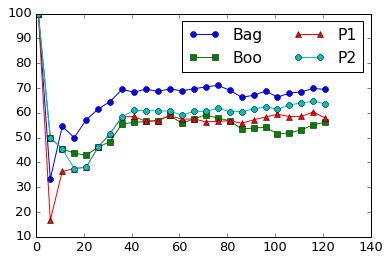

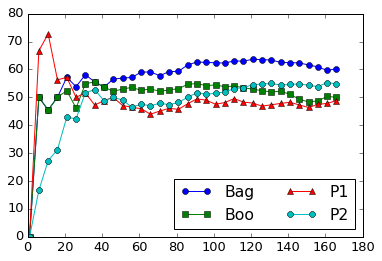

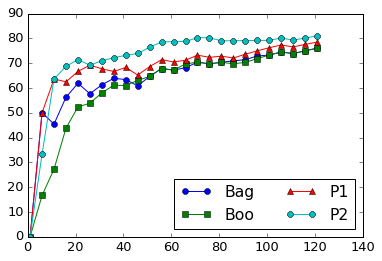

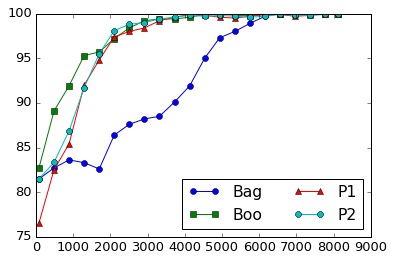

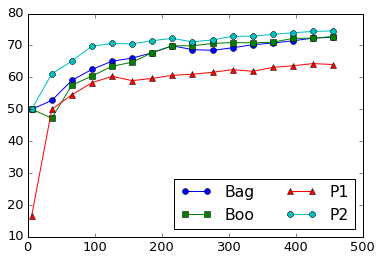

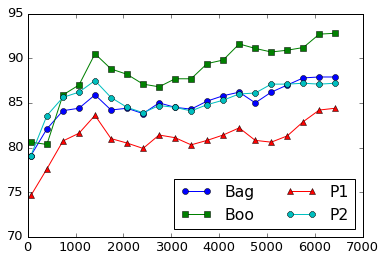

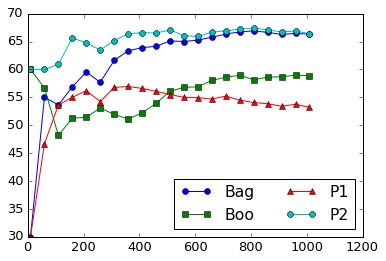

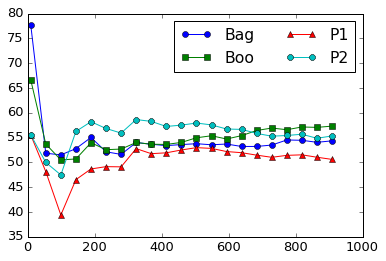

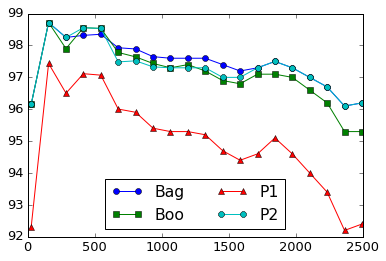

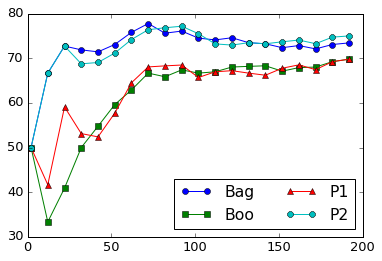

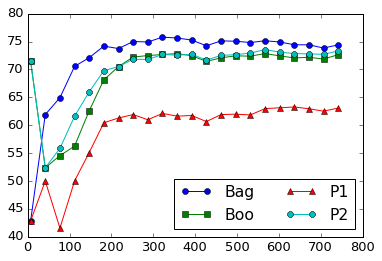

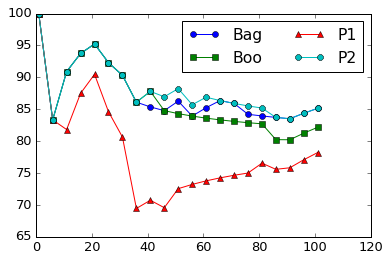

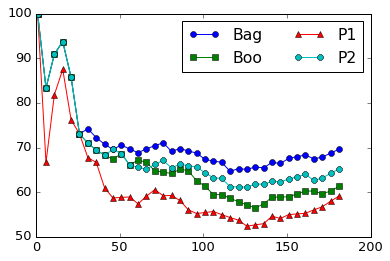

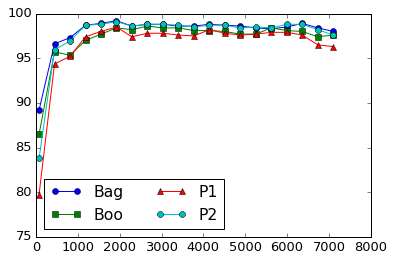

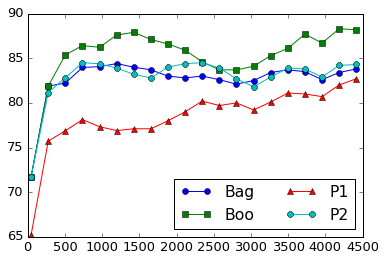

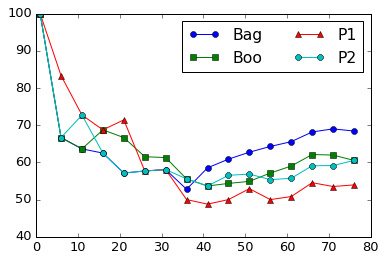

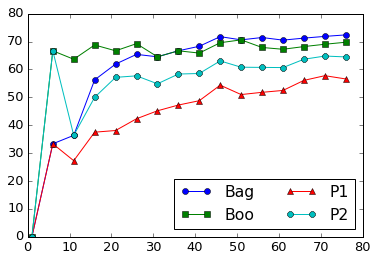

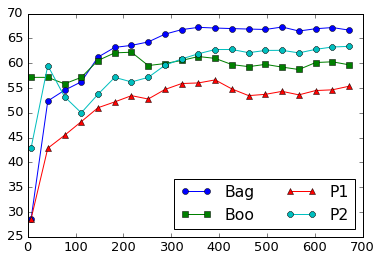

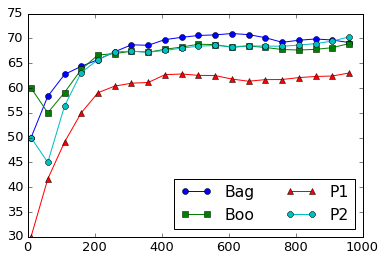

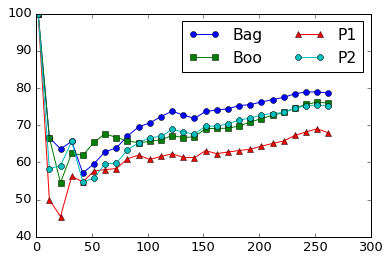

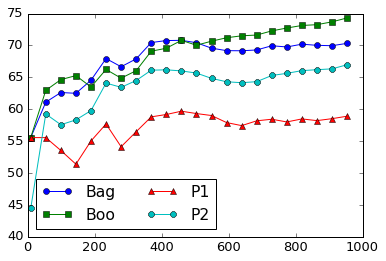

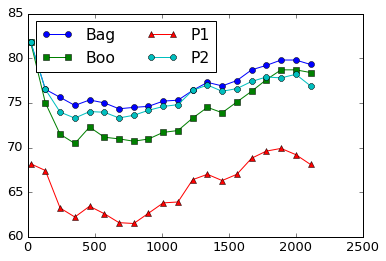

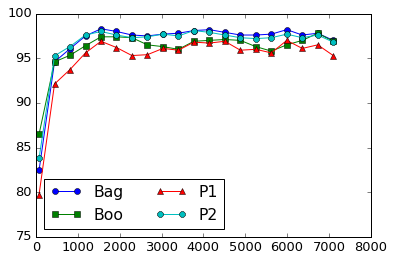

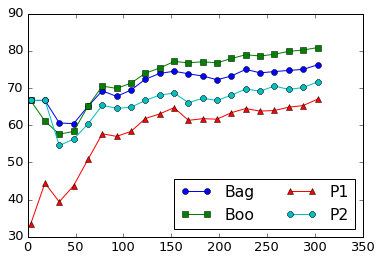

In [2]:
pth = 'outputs2/'
base = 'hoeff'
algs = [ 'bagging-'+base, 'boosting-'+base, 'pame1-bag-'+base, 'pame3-bag-'+base]
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
datas=  ['acute-inflammation','acute-nephritis','adult_train','bank','blood','breast-cancer','breast-cancer-wisc-diag','breast-cancer-wisc','breast-cancer-wisc-prog','chess-krvkp','congressional-voting','conn-bench-sonar-mines-rocks','connect-4','credit-approval','cylinder-bands','echocardiogram','fertility','haberman-survival','heart-hungarian','hepatitis','hill-valley_train','horse-colic_train','ilpd-indian-liver','ionosphere','magic','mammographic','miniboone','molec-biol-promoter','monks-1_train','monks-2_train','monks-3_train','mushroom','musk-1','musk-2','oocytes_merluccius_nucleus_4d','oocytes_trisopterus_nucleus_2f','ozone','parkinsons','pima','pittsburg-bridges-T-OR-D','planning','ringnorm','spambase','spect_train','spectf_train','statlog-australian-credit','statlog-german-credit','statlog-heart','tic-tac-toe','titanic','twonorm','vertebral-column-2clases']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'
TZ = 'model cost (RAM-Hours)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D', '+', '*', 'x']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    #z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
        #print pth+'results-'+datas[j]+'-'+algs[i]+'.csv'
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
        mdlcst[j, i] = df[TZ].mean()
    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["Bag", "Boo", "P1", "P2"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'-error.pdf', format='pdf')


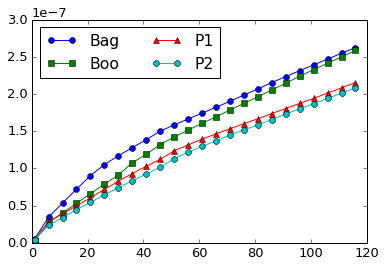

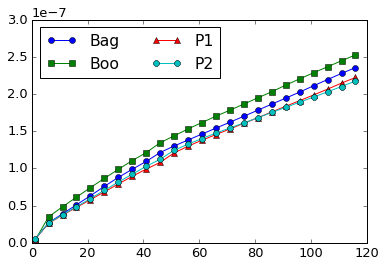

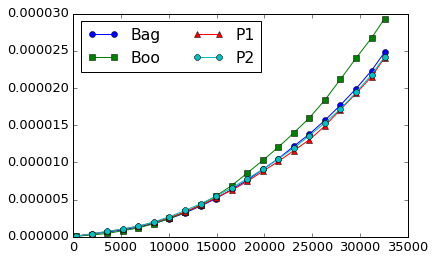

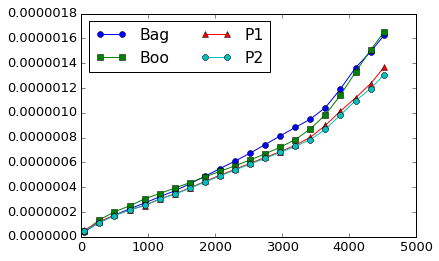

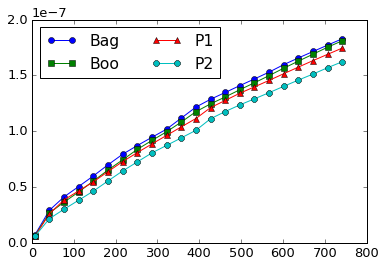

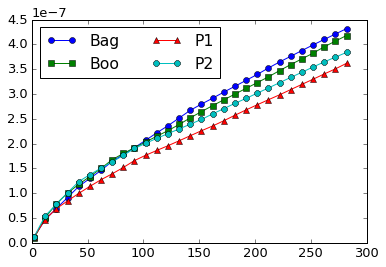

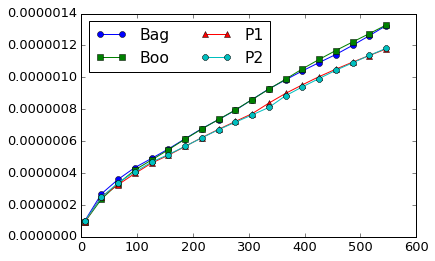

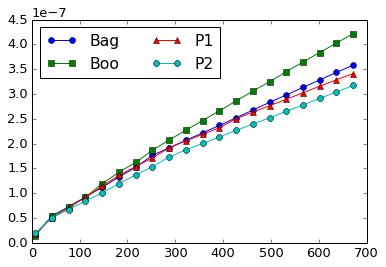

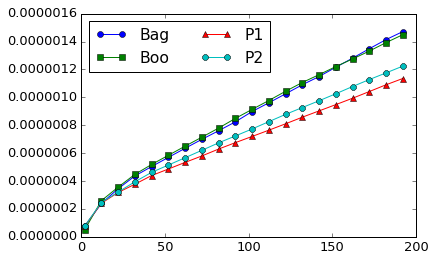

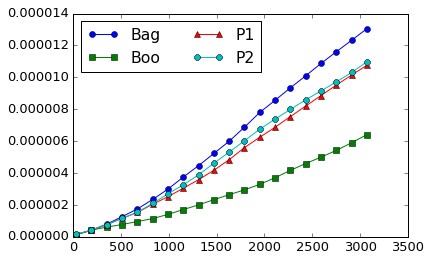

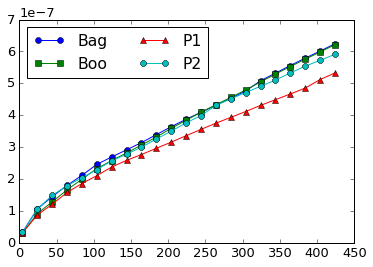

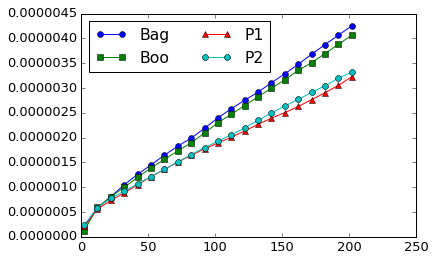

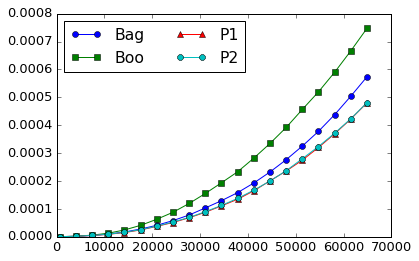

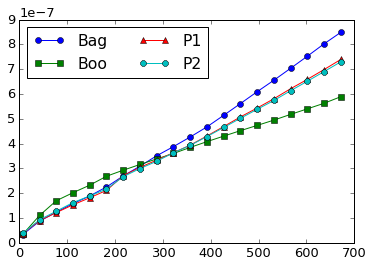

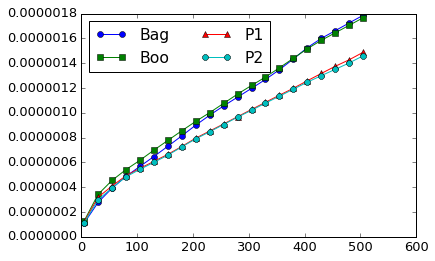

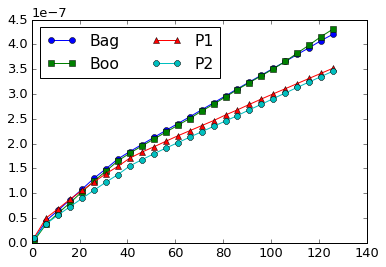

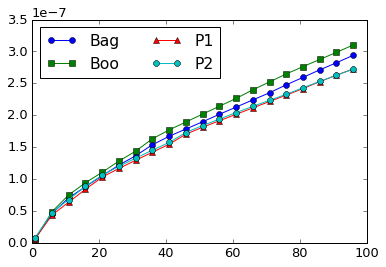

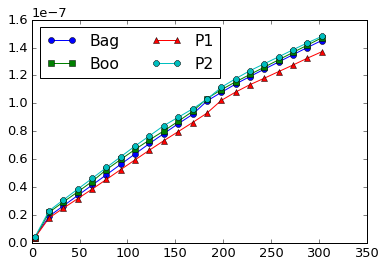

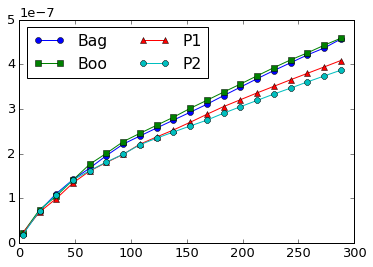

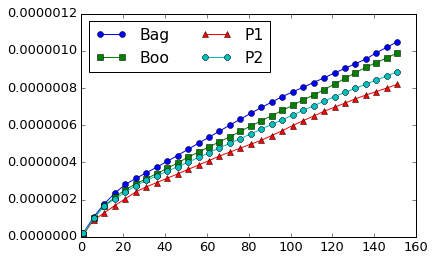

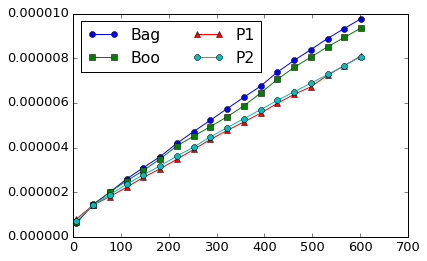

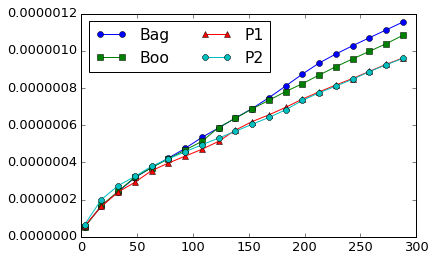

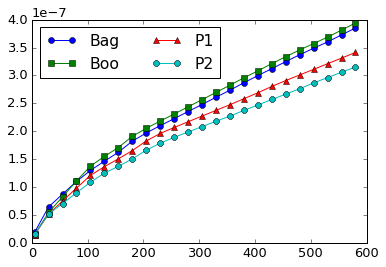

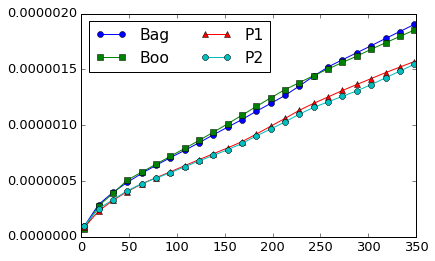

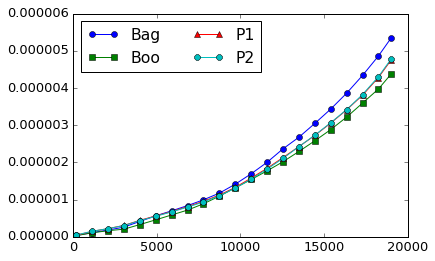

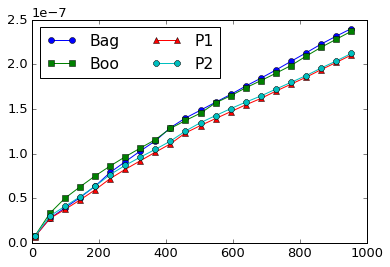

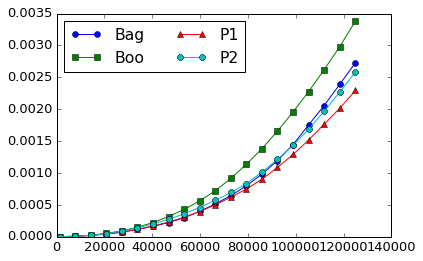

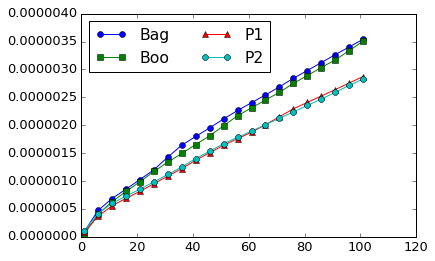

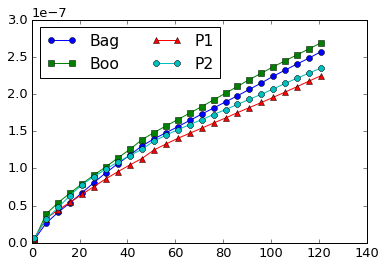

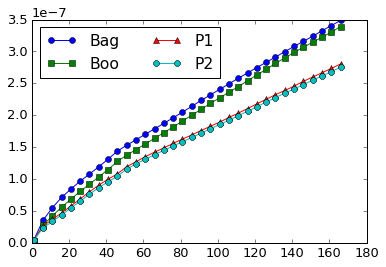

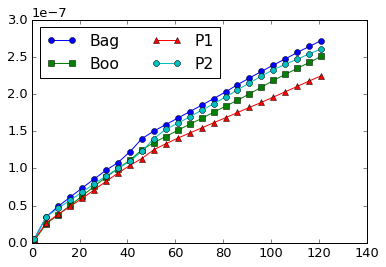

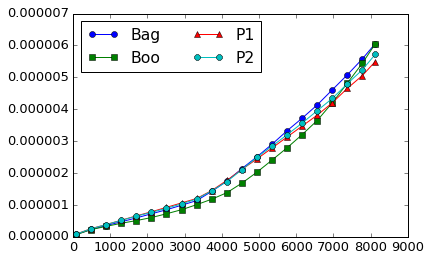

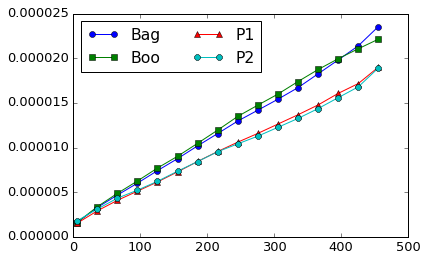

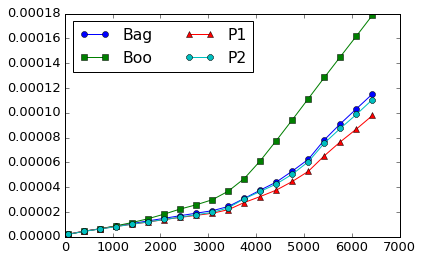

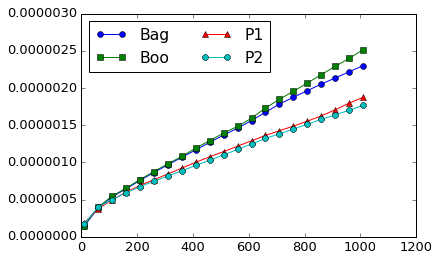

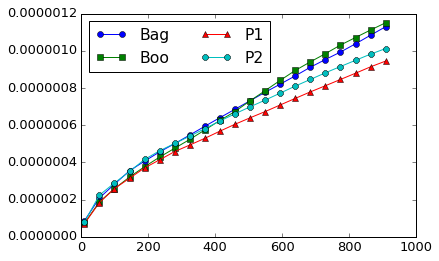

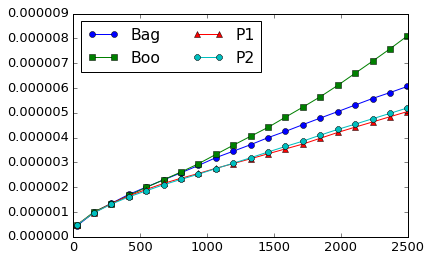

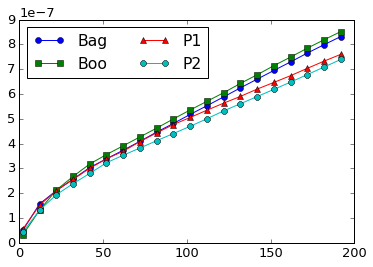

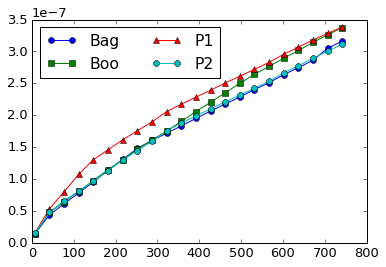

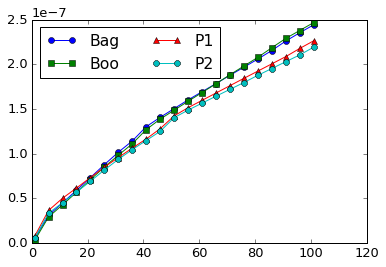

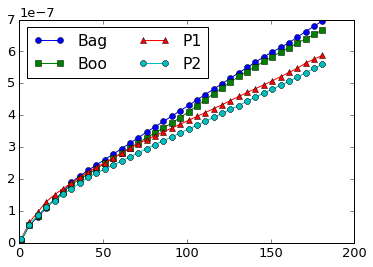

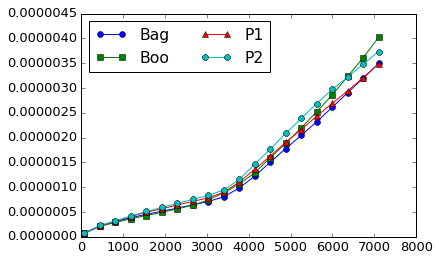

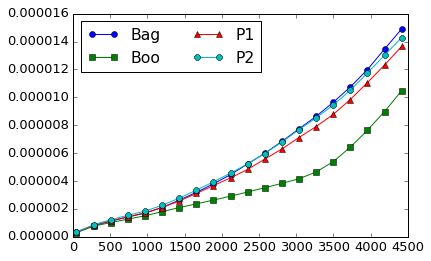

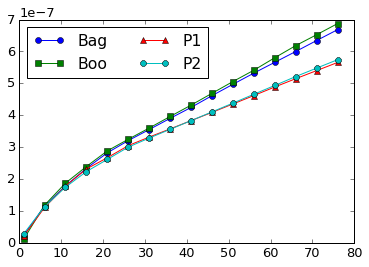

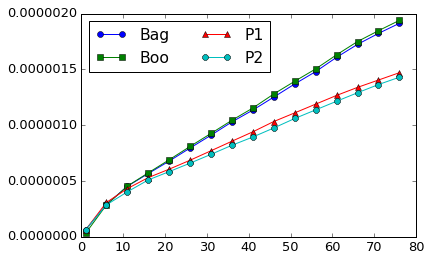

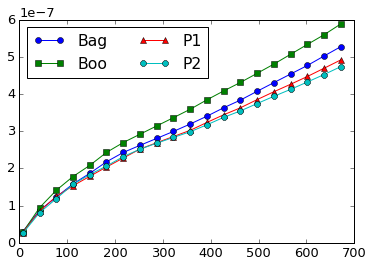

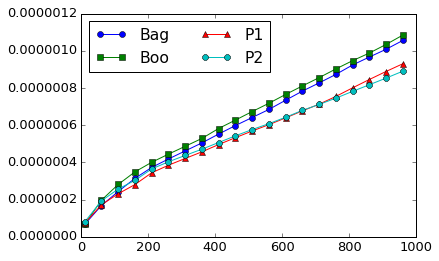

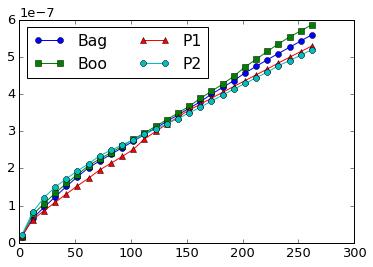

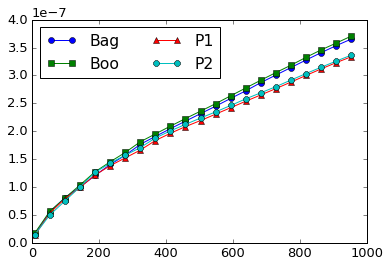

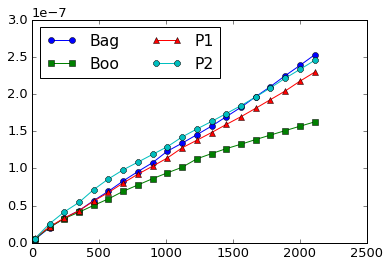

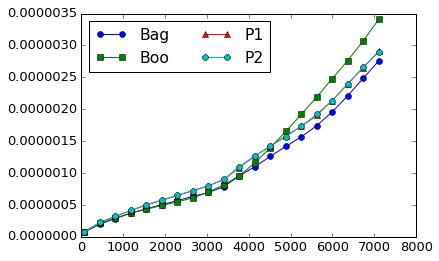

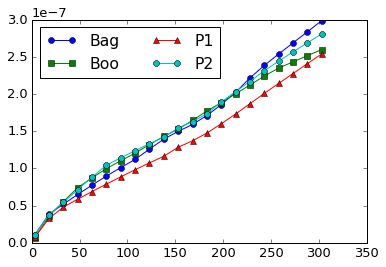

In [3]:
pth = 'outputs2/'
base = 'hoeff'
algs = [ 'bagging-'+base, 'boosting-'+base, 'pame1-bag-'+base, 'pame3-bag-'+base]
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
datas=  ['acute-inflammation','acute-nephritis','adult_train','bank','blood','breast-cancer','breast-cancer-wisc-diag','breast-cancer-wisc','breast-cancer-wisc-prog','chess-krvkp','congressional-voting','conn-bench-sonar-mines-rocks','connect-4','credit-approval','cylinder-bands','echocardiogram','fertility','haberman-survival','heart-hungarian','hepatitis','hill-valley_train','horse-colic_train','ilpd-indian-liver','ionosphere','magic','mammographic','miniboone','molec-biol-promoter','monks-1_train','monks-2_train','monks-3_train','mushroom','musk-1','musk-2','oocytes_merluccius_nucleus_4d','oocytes_trisopterus_nucleus_2f','ozone','parkinsons','pima','pittsburg-bridges-T-OR-D','planning','ringnorm','spambase','spect_train','spectf_train','statlog-australian-credit','statlog-german-credit','statlog-heart','tic-tac-toe','titanic','twonorm','vertebral-column-2clases']
nalg = len(algs)
ndatas = len(datas)
TZ = 'model cost (RAM-Hours)'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


for j in range(ndatas):
    #z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[TZ][t], marker=mrk[i])    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["Bag", "Boo", "P1", "P2"], ncol=2, loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'-model-cost.pdf', format='pdf')


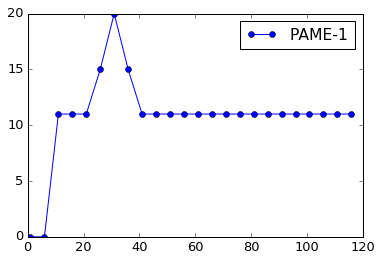

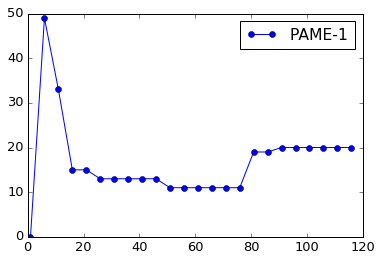

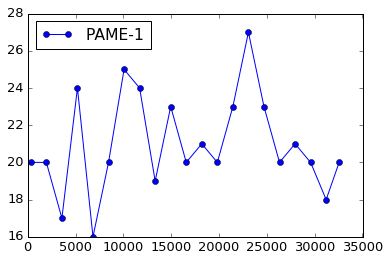

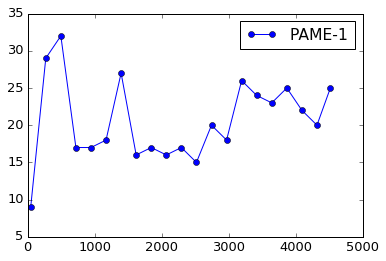

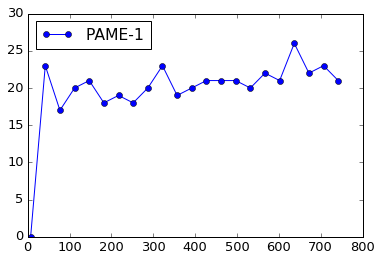

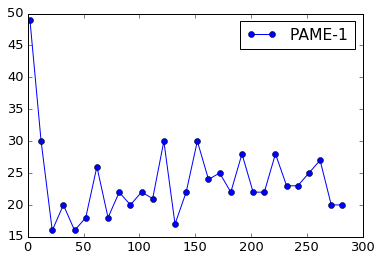

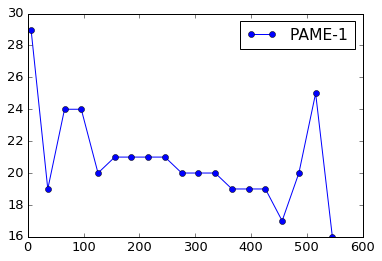

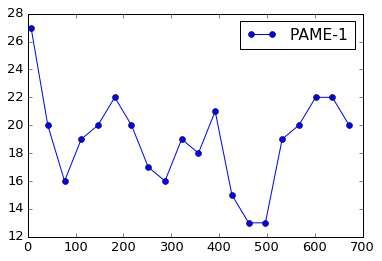

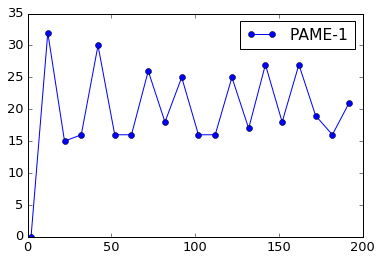

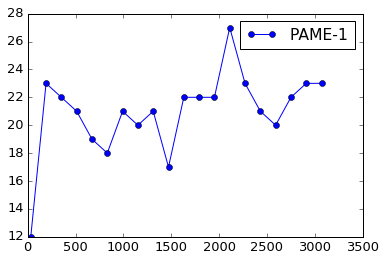

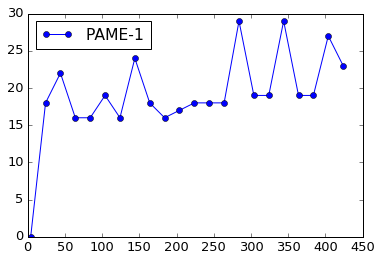

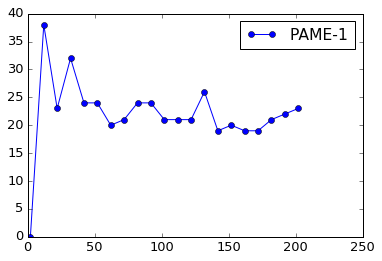

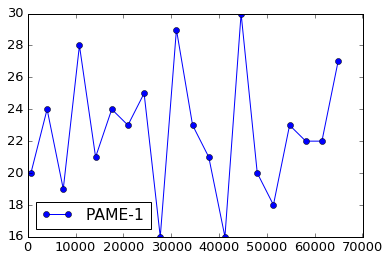

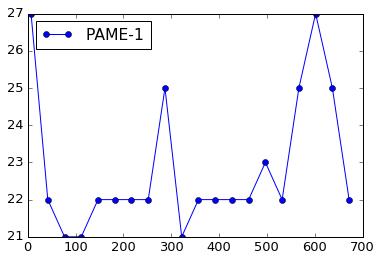

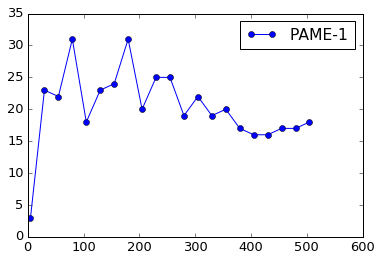

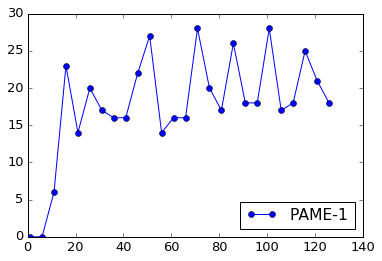

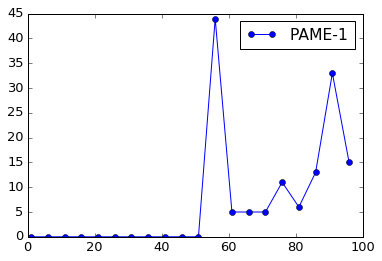

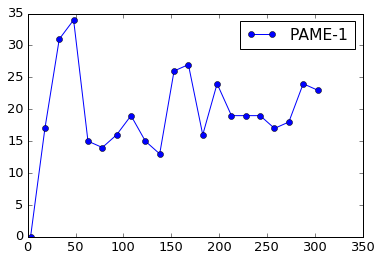

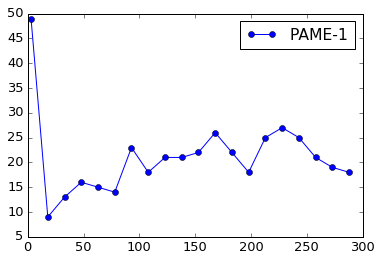

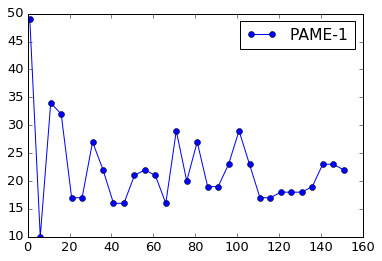

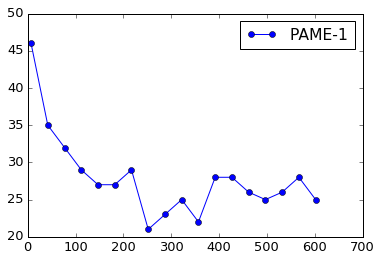

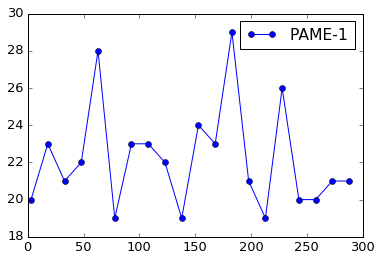

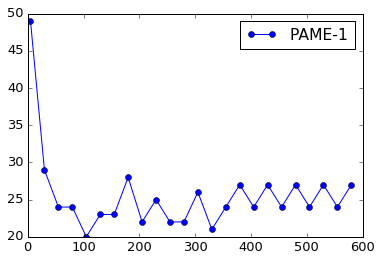

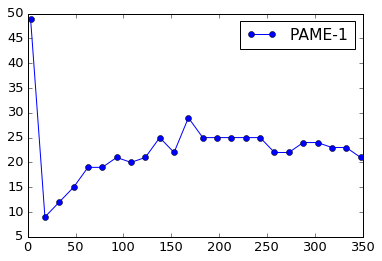

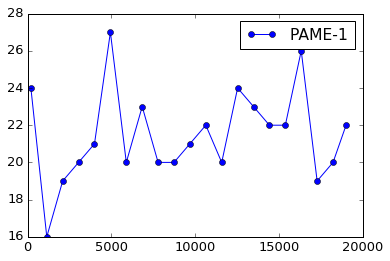

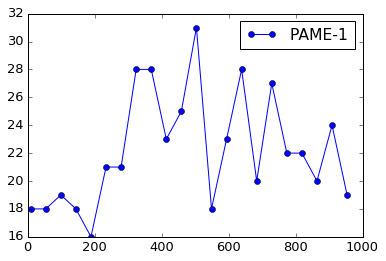

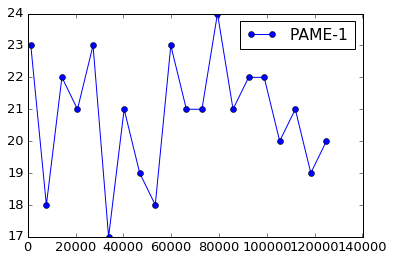

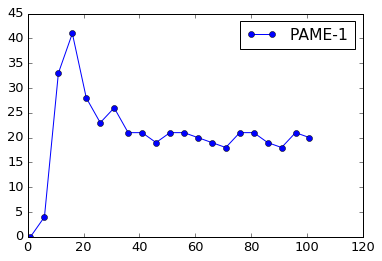

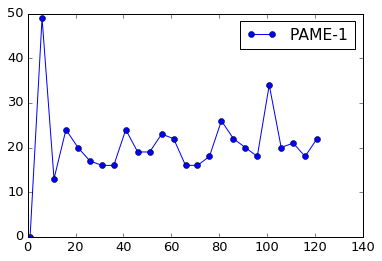

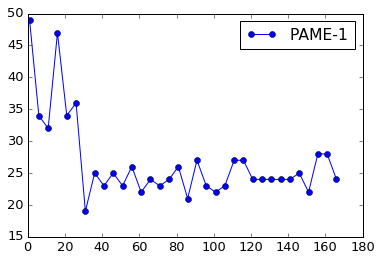

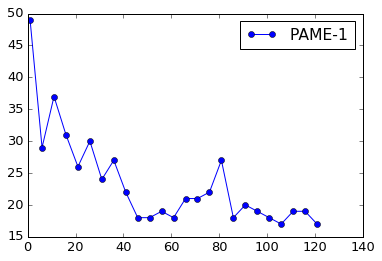

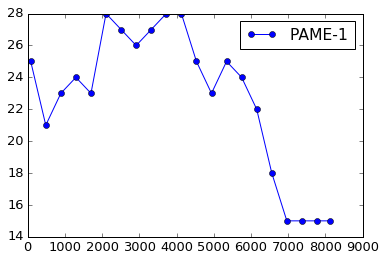

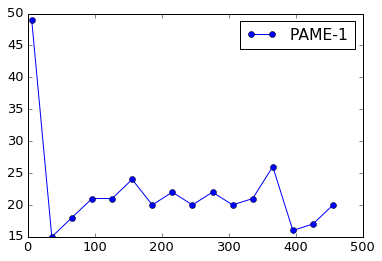

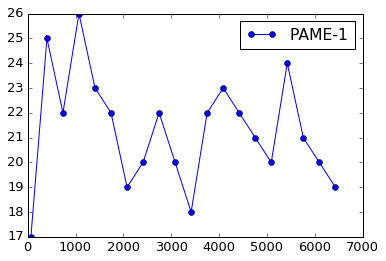

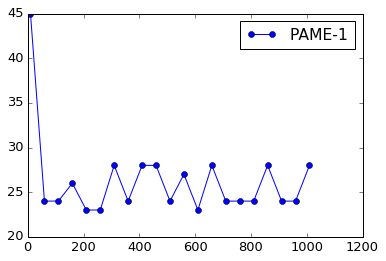

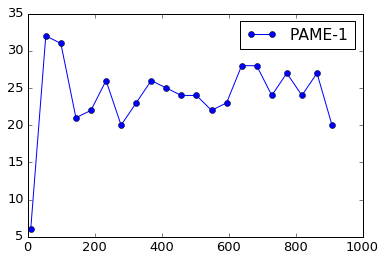

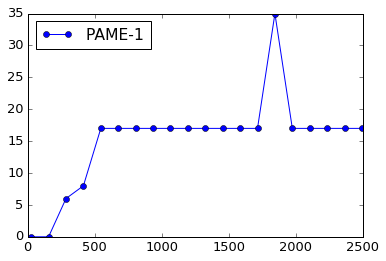

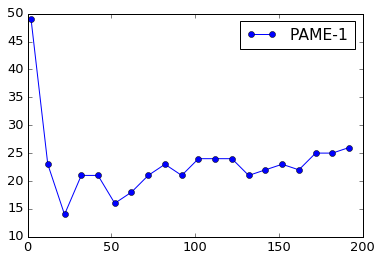

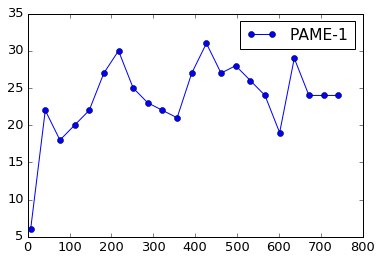

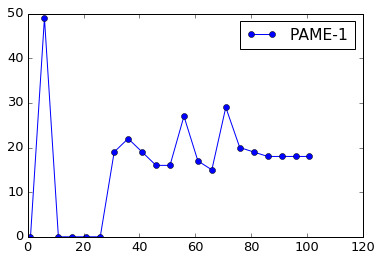

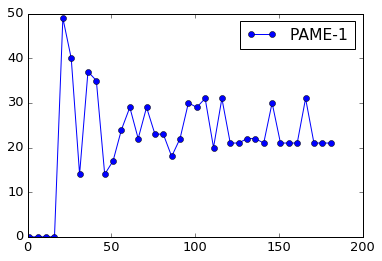

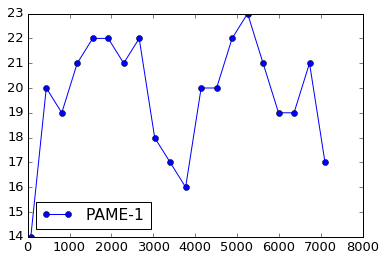

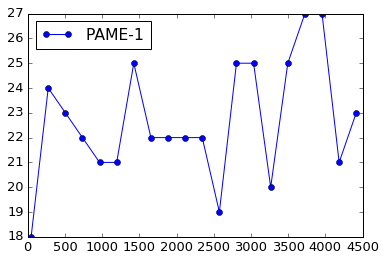

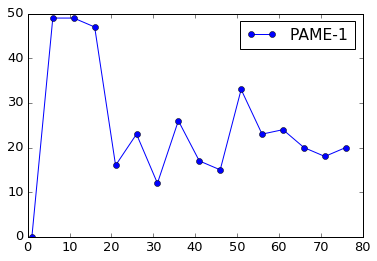

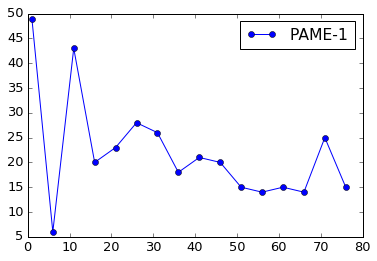

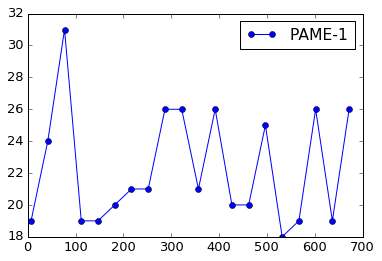

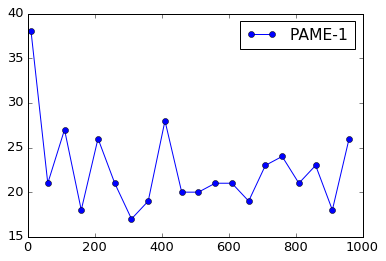

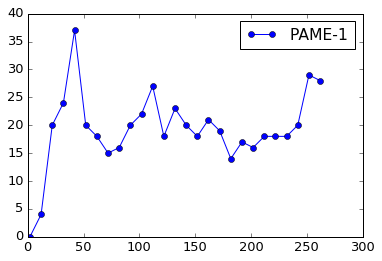

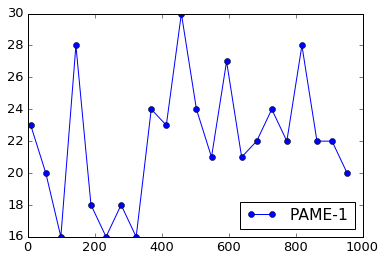

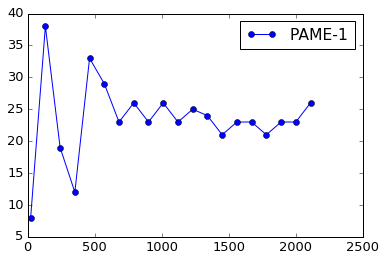

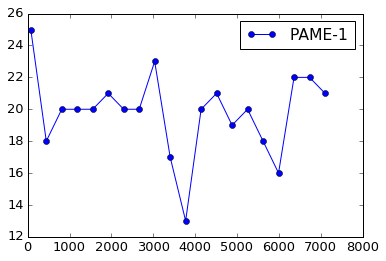

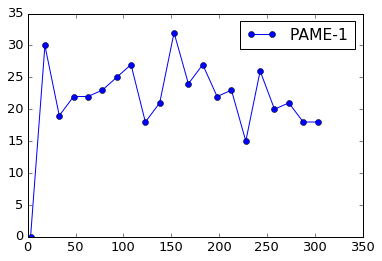

In [4]:
pth = 'outputs2/'
base = 'hoeff'
algs = ['pame1-bag-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
datas=  ['acute-inflammation','acute-nephritis','adult_train','bank','blood','breast-cancer','breast-cancer-wisc-diag','breast-cancer-wisc','breast-cancer-wisc-prog','chess-krvkp','congressional-voting','conn-bench-sonar-mines-rocks','connect-4','credit-approval','cylinder-bands','echocardiogram','fertility','haberman-survival','heart-hungarian','hepatitis','hill-valley_train','horse-colic_train','ilpd-indian-liver','ionosphere','magic','mammographic','miniboone','molec-biol-promoter','monks-1_train','monks-2_train','monks-3_train','mushroom','musk-1','musk-2','oocytes_merluccius_nucleus_4d','oocytes_trisopterus_nucleus_2f','ozone','parkinsons','pima','pittsburg-bridges-T-OR-D','planning','ringnorm','spambase','spect_train','spectf_train','statlog-australian-credit','statlog-german-credit','statlog-heart','tic-tac-toe','titanic','twonorm','vertebral-column-2clases']

nalg = len(algs)
ndatas = len(datas)
F = 'negative weights'
T = 'learning evaluation instances'
mrk = ['o', 's', '^', '8', 'p', 'D']
ln = []
lims = [[35,65], [55,85], [70,95], [60,95], [45,65], [45,80], [60,90], [30,90], [40,80], 
        [42,58], [65,96], [35,75], [55,85], [10,90], [76,96], [62,78], [65,90], [64,82],
        [94,106], [70,95], [92,98], [75,100]]


accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    #z = lims[j]
    plt.figure()
    #print "Running datas " + datas[j]
    for i in range(nalg):
        #print "   -- " + algs[i]
        #results-car_v2-pame1-hoeff.csv
        if datas[j] == 'splice_v2':
            nsep = 50
        else:
            nsep = 5
                
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        t = range(0, len(df[T]), nsep)
        plt.plot(df[T][t], df[F][t], marker=mrk[i])
        accs[j, i] = df[F].mean()
        mdlcst[j, i] = df[TZ].mean()
    
    
    #plt.ylim(z[0],z[1])
    plt.legend(["PAME-1"], loc='best')
    font = {'size'   : 13}
    plt.rc('font', **font)
    plt.savefig('plots/results-'+datas[j]+'-'+base+'nweights.pdf', format='pdf')


# Statistical Hypothesis Testing

Apply the Friedman test and Bonferroni-Dunn test as described by Janez Demsar. 

In [5]:
pth = 'outputs2/'
base = 'hoeff'
algs = ['bagging-'+base, 'boosting-'+base, 'pame1-bag-'+base, 'pame3-bag-'+base]
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
datas=  ['acute-inflammation','acute-nephritis','adult_train','bank','blood','breast-cancer','breast-cancer-wisc-diag','breast-cancer-wisc','breast-cancer-wisc-prog','chess-krvkp','congressional-voting','conn-bench-sonar-mines-rocks','connect-4','credit-approval','cylinder-bands','echocardiogram','fertility','haberman-survival','heart-hungarian','hepatitis','hill-valley_train','horse-colic_train','ilpd-indian-liver','ionosphere','magic','mammographic','miniboone','molec-biol-promoter','monks-1_train','monks-2_train','monks-3_train','mushroom','musk-1','musk-2','oocytes_merluccius_nucleus_4d','oocytes_trisopterus_nucleus_2f','ozone','parkinsons','pima','pittsburg-bridges-T-OR-D','planning','ringnorm','spambase','spect_train','spectf_train','statlog-australian-credit','statlog-german-credit','statlog-heart','tic-tac-toe','titanic','twonorm','vertebral-column-2clases']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'

accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        accs[j, i] = df[F].mean()

Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ss = np.argsort(accs[i])
    for m, n in map(None, range(nalg), ss):
        ranks[i, n] = nalg - m
    #ranks[i] = nalg-rs[np.argsort(accs[i])]
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)


pF = 1 - f.cdf(FF, nalg-1, (nalg-1)*(ndatas-1))
if pF < 0.05: 
    print "Friedman: Reject the Null Hypothesis"
else:
    print "Friedman: Fail to Reject the Null Hypothesis"
print " "        

for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))

        
s = ' & '
for alg in algs: 
    s += alg + ' & '
print s

for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(np.round(1000*accs[j,i])/1000) + ' (' + str(ranks[j,i]) + ') & '
    s += str(np.round(1000*accs[j,nalg-1])/1000) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

Friedman: Reject the Null Hypothesis
 
 & bagging-hoeff & boosting-hoeff & pame1-bag-hoeff & pame3-bag-hoeff & 
acute-inflammation & 87.416 (2.0) & 88.291 (1.0) & 78.202 (4.0) & 85.128 (3.0) \\
acute-nephritis & 88.669 (3.0) & 89.068 (1.0) & 79.521 (4.0) & 88.795 (2.0) \\
adult_train & 83.341 (1.0) & 82.061 (3.0) & 76.754 (4.0) & 82.568 (2.0) \\
bank & 87.991 (1.0) & 85.393 (3.0) & 81.001 (4.0) & 86.718 (2.0) \\
blood & 76.815 (1.0) & 73.45 (3.0) & 65.624 (4.0) & 75.815 (2.0) \\
breast-cancer & 74.882 (2.0) & 70.684 (3.0) & 61.613 (4.0) & 75.296 (1.0) \\
breast-cancer-wisc-diag & 87.647 (3.0) & 89.703 (2.0) & 86.342 (4.0) & 90.001 (1.0) \\
breast-cancer-wisc & 89.738 (2.0) & 90.046 (1.0) & 83.334 (4.0) & 87.577 (3.0) \\
breast-cancer-wisc-prog & 74.21 (1.0) & 66.407 (2.0) & 66.034 (4.0) & 66.05 (3.0) \\
chess-krvkp & 87.945 (2.0) & 90.045 (1.0) & 83.752 (4.0) & 86.781 (3.0) \\
congressional-voting & 59.082 (1.0) & 57.305 (3.0) & 50.477 (4.0) & 58.465 (2.0) \\
conn-bench-sonar-mines-roc

In [ ]:
pth = 'outputs2/'
base = 'hoeff'
algs = [base, 'bagging-'+base, 'boosting-'+base, 'pame1-bag-'+base, 'pame3-bag-'+base]
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
datas=  ['acute-inflammation','acute-nephritis','adult_train','bank','blood','breast-cancer','breast-cancer-wisc-diag','breast-cancer-wisc','breast-cancer-wisc-prog','chess-krvkp','congressional-voting','conn-bench-sonar-mines-rocks','connect-4','credit-approval','cylinder-bands','echocardiogram','fertility','haberman-survival','heart-hungarian','hepatitis','hill-valley_train','horse-colic_train','ilpd-indian-liver','ionosphere','magic','mammographic','miniboone','molec-biol-promoter','monks-1_train','monks-2_train','monks-3_train','mushroom','musk-1','musk-2','oocytes_merluccius_nucleus_4d','oocytes_trisopterus_nucleus_2f','ozone','parkinsons','pima','pittsburg-bridges-T-OR-D','planning','ringnorm','spambase','spect_train','spectf_train','statlog-australian-credit','statlog-german-credit','statlog-heart','tic-tac-toe','titanic','twonorm','vertebral-column-2clases']
nalg = len(algs)
ndatas = len(datas)
F = 'model cost (RAM-Hours)'
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        mdlcst[j, i] = df[F].mean()
        
Z = np.zeros((nalg, nalg))
ranks = np.zeros((ndatas, nalg))
for i in range(ndatas):
    ss = np.argsort(accs[i])
    for m, n in map(None, range(nalg), ss):
        ranks[i, n] = 1 + m
R = ranks.mean(axis=0)

# chi-squared stat
XF = 12*ndatas/(nalg*(nalg+1)) * ((R**2).sum() - (nalg*(nalg+1)**2)/4)
FF = (ndatas-1)*XF/(ndatas*(nalg-1)-XF)

pF = 1 - f.cdf(FF, nalg-1, (nalg-1)*(ndatas-1))
if pF < 0.05: 
    print "Friedman: Reject the Null Hypothesis"
else:
    print "Friedman: Fail to Reject the Null Hypothesis"
print " "        


for i in range(nalg):
    for j in range(nalg):
        Z[i,j] = (R[i]-R[j])/(np.sqrt(1.*(nalg*(nalg+1))/(6*ndatas)))
        
for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(100000000*mdlcst[j,i]) + ' (' + str(ranks[j,i]) + ') & '
    s += str(mdlcst[j,nalg-1]) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

In [ ]:
for j in range(ndatas):
    s = datas[j] + ' & '
    for i in range(nalg-1):
        s += str(np.round(1000*accs[j,i])/1000) + ' (' + str(ranks[j,i]) + ') & '
    s += str(np.round(1000*accs[j,nalg-1])/1000) + ' (' + str(ranks[j,nalg-1]) + ') \\\\'
    print s
s = ' & '
for i in range(nalg-1):
    s += str(np.round(100*R[i])/100) + ' & '
s += str(np.round(100*R[nalg-1])/100) + ' \\\\ '
print s

In [ ]:
df = pd.read_csv('outputs/kl-elec.csv')
out = plt.hist(df['KL-div'], 20)
plt.xlabel('KL-divergence')
plt.ylabel('Relative Frequency')
font = {'size'   : 13}
plt.rc('font', **font)
plt.savefig('plots/kl-elec.pdf', format='pdf')

plt.figure()
df = pd.read_csv('outputs/kl-abalone.csv')
out = plt.hist(df['KL-div'], 20)
plt.xlabel('KL-divergence')
plt.ylabel('Relative Frequency')
font = {'size'   : 13}
plt.rc('font', **font)
plt.savefig('plots/kl-abalone.pdf', format='pdf')


In [ ]:
_,p = wilcoxon(accs[:,0], accs[:,1])
print "p: ", p

In [13]:
pth = 'outputs2/'
base = 'hoeff'
algs = ['bagging-'+base, 'boosting-'+base, 'pame1-bag-'+base, 'pame3-bag-'+base]
#algs = [base, 'bagging-'+base, 'boosting-'+base, 
#        'pame1-bag-'+base, 'pame2-bag-'+base, 'pame3-bag-'+base, 
#        'pame1-boo-'+base, 'pame2-boo-'+base, 'pame3-boo-'+base]
# 'spam' , 'poker'
datas = ['abalone_v2', 'airlines', 'breast-w' ,'car_v2' ,'cmc_v2' ,'colic' ,'cov_v2' ,'credit-a' ,
         'diabetes' ,'dow' ,'elecNormNew' ,'german' ,'haberman' ,'hepatitis' ,'hyper' ,'image' ,
         'magic' ,'noaa' ,'sea' ,'sick' ,'splice_v2']
datas=  ['acute-inflammation','acute-nephritis','adult_train','bank','blood','breast-cancer','breast-cancer-wisc-diag','breast-cancer-wisc','breast-cancer-wisc-prog','chess-krvkp','congressional-voting','conn-bench-sonar-mines-rocks','connect-4','credit-approval','cylinder-bands','echocardiogram','fertility','haberman-survival','heart-hungarian','hepatitis','hill-valley_train','horse-colic_train','ilpd-indian-liver','ionosphere','magic','mammographic','miniboone','molec-biol-promoter','monks-1_train','monks-2_train','monks-3_train','mushroom','musk-1','musk-2','oocytes_merluccius_nucleus_4d','oocytes_trisopterus_nucleus_2f','ozone','parkinsons','pima','pittsburg-bridges-T-OR-D','planning','ringnorm','spambase','spect_train','spectf_train','statlog-australian-credit','statlog-german-credit','statlog-heart','tic-tac-toe','titanic','twonorm','vertebral-column-2clases']
nalg = len(algs)
ndatas = len(datas)
F = 'classifications correct (percent)'
alpha = .05
idxs = []

accs = np.zeros((ndatas, nalg))
mdlcst = np.zeros((ndatas, nalg))

for j in range(ndatas):
    mmax = 0
    idx = 0
    for i in range(nalg):
        df = pd.read_csv(pth+'results-'+datas[j]+'-'+algs[i]+'.csv')
        accs[j, i] = df[F].mean()
        if accs[j, i] > mmax:
            mmax = accs[j, i]
            idx = i
    idxs.append(idx)

_,p_ba_p1 = wilcoxon(accs[:,0], accs[:,2])
_,p_ba_p3 = wilcoxon(accs[:,0], accs[:,3])
_,p_bo_p1 = wilcoxon(accs[:,1], accs[:,2])
_,p_bo_p3 = wilcoxon(accs[:,1], accs[:,3])

if p_ba_p1 <= alpha:
    if accs[:,2].sum() > accs[:,0].sum():
        print "PAME1 is better than Bagging ("+str(p_ba_p1)+")"
if p_ba_p3 <= alpha:
    if accs[:,3].sum() > accs[:,0].sum():
        print "PAME3 is better than Bagging ("+str(p_ba_p3)+")"
if p_bo_p1 <= alpha:
    if accs[:,2].sum() > accs[:,1].sum():
        print "PAME1 is better than Boosting ("+str(p_bo_p1)+")"
if p_bo_p3 <= alpha:
    if accs[:,3].sum() > accs[:,1].sum():
        print "PAME3 is better than Boosting ("+str(p_bo_p3)+")"
        
print ' '
print accs[:,2].sum(), ' ', accs[:,0].sum()
print accs[:,2].sum(), ' ', accs[:,1].sum()
print accs[:,3].sum(), ' ', accs[:,0].sum()
print accs[:,3].sum(), ' ', accs[:,1].sum()
print p_ba_p1, p_ba_p3, p_bo_p1,p_bo_p3
print ' '
print ' '

for j in range(ndatas):
    s = datas[j].replace('_train', '').replace('_', '-') + ' & '
    for i in range(nalg-1):
        if idxs[j] == i:
            s += str(1.*int(100*accs[j,i])/100) + '$^*$ & '
        else:
            s += str(1.*int(100*accs[j,i])/100) + ' & '
    if idxs[j] == nalg-1:
        s += str(1.*int(100*accs[j,nalg-1])/100)  + '$^*$ \\\\'
    else:
        s += str(1.*int(100*accs[j,nalg-1])/100)  + ' \\\\'
            
    print s


 
3541.92848595   3919.37198484
3541.92848595   3850.62407379
3857.36763965   3919.37198484
3857.36763965   3850.62407379
2.58607240252e-09 0.00665040281547 1.92101860688e-08 0.629332492313
 
 
acute-inflammation & 87.41 & 88.29$^*$ & 78.2 & 85.12 \\
acute-nephritis & 88.66 & 89.06$^*$ & 79.52 & 88.79 \\
adult & 83.34$^*$ & 82.06 & 76.75 & 82.56 \\
bank & 87.99$^*$ & 85.39 & 81.0 & 86.71 \\
blood & 76.81$^*$ & 73.44 & 65.62 & 75.81 \\
breast-cancer & 74.88 & 70.68 & 61.61 & 75.29$^*$ \\
breast-cancer-wisc-diag & 87.64 & 89.7 & 86.34 & 90.0$^*$ \\
breast-cancer-wisc & 89.73 & 90.04$^*$ & 83.33 & 87.57 \\
breast-cancer-wisc-prog & 74.2$^*$ & 66.4 & 66.03 & 66.04 \\
chess-krvkp & 87.94 & 90.04$^*$ & 83.75 & 86.78 \\
congressional-voting & 59.08$^*$ & 57.3 & 50.47 & 58.46 \\
conn-bench-sonar-mines-rocks & 61.25 & 65.71$^*$ & 55.93 & 59.04 \\
connect-4 & 75.38$^*$ & 72.75 & 64.74 & 74.61 \\
credit-approval & 76.08 & 77.12$^*$ & 71.01 & 74.42 \\
cylinder-bands & 65.51 & 67.22$^*$ & 58.62 & 6

In [ ]:
print p_ba_p1, p_ba_p3, p_bo_p1,p_bo_p3

In [ ]:
accs